# ASSOCIATION RULES MINING

### Installing and importing libraries for doing ARM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Install 'mlxtend library' to work with apriori algorithm. (Note - There are other implementations of ARM also)**

In [2]:
# pip install mlxtend on the command terminal (if not already installed)
# 1) go to anaconda prompt (you can also go here through Anaconda Navigator --> Environments --> base --> Open Terminal)
# 2) pip install mlxtend on the terminal

**Import apriori algorithm through mlxtend**

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Step 1. Load the grocery dataset and prepare the dataset

**Load the Groceries DataSet**

In [4]:
grocery = pd.read_csv('GroceriesOriginal.csv')

In [5]:
grocery.head(5)

,itemsetID,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Lets look at the shape**

In [6]:
grocery.shape

(9835, 170)

**Q. How to get the column names ?**

In [7]:
list(grocery.columns)

['itemsetID',
 'frankfurter',
 'sausage',
 'liver loaf',
 'ham',
 'meat',
 'finished products',
 'organic sausage',
 'chicken',
 'turkey',
 'pork',
 'beef',
 'hamburger meat',
 'fish',
 'citrus fruit',
 'tropical fruit',
 'pip fruit',
 'grapes',
 'berries',
 'nuts/prunes',
 'root vegetables',
 'onions',
 'herbs',
 'other vegetables',
 'packaged fruit/vegetables',
 'whole milk',
 'butter',
 'curd',
 'dessert',
 'butter milk',
 'yogurt',
 'whipped/sour cream',
 'beverages',
 'UHT-milk',
 'condensed milk',
 'cream',
 'soft cheese',
 'sliced cheese',
 'hard cheese',
 'cream cheese ',
 'processed cheese',
 'spread cheese',
 'curd cheese',
 'specialty cheese',
 'mayonnaise',
 'salad dressing',
 'tidbits',
 'frozen vegetables',
 'frozen fruits',
 'frozen meals',
 'frozen fish',
 'frozen chicken',
 'ice cream',
 'frozen dessert',
 'frozen potato products',
 'domestic eggs',
 'rolls/buns',
 'white bread',
 'brown bread',
 'pastry',
 'roll products ',
 'semi-finished bread',
 'zwieback',
 'potat

**dont need itemsetID, so let's drop it**

In [8]:
grocery = grocery.drop('itemsetID', axis=1)
grocery.shape

(9835, 169)

**convert boolean values to int**

In [9]:
grocery = grocery.astype('int')
grocery.head(3)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#lets give new names to rows instead of 0, 1

In [11]:
rnames = ['R' +str(i) for i in range(0,9835)]
grocery.index = rnames
grocery.head(3)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# we have total 9835 transactions, and 169 columns (or food items)

### 1.1. Preliminary exploration and visualization

**The data frame above is a sparse matrix**

In [13]:
# Lets see what items are there in transaction 'R1'
grocery.loc['R1', grocery.loc['R1',:].gt(0)]

tropical fruit    1
yogurt            1
coffee            1
Name: R1, dtype: int32

In [14]:
# Lets see what items are there in transaction 'R2'
grocery.loc['R2', grocery.loc['R2',:].gt(0)]

whole milk    1
Name: R2, dtype: int32

**count of items in each transaction**

In [15]:
grocery.sum(axis=1).head(5)

R0    4
R1    3
R2    1
R3    4
R4    4
dtype: int64

In [16]:
grocery.head(2)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#grocery.to_csv('groc.csv')

**Lets find the most popular itemS**

In [18]:
grocery.sum(0).sort_values(ascending=False).head(10)

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
dtype: int64

In [19]:
popular_items = pd.DataFrame(grocery.sum(0).sort_values(ascending=False)).reset_index()
popular_items.head(3)

,index,0
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809


In [20]:
popular_items.rename(columns = {'index':'item', 0:'freq'}, inplace=True)
popular_items.head(3)

,item,freq
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809


In [21]:
popular_items['support'] = popular_items['freq']/grocery.shape[0]
popular_items = popular_items.head(10)
popular_items.head(3)

,item,freq,support
0,whole milk,2513,0.255516
1,other vegetables,1903,0.193493
2,rolls/buns,1809,0.183935


In [22]:
popular_items.head(3) # there are in total 9835 transactions

,item,freq,support
0,whole milk,2513,0.255516
1,other vegetables,1903,0.193493
2,rolls/buns,1809,0.183935


**Matplotlib visualization: Lets look at a simple visualizationfor 10 most popular item**

In [23]:
# We leverage matplotlib.pyplot library for this. We already imported it earlier and aliased with plt

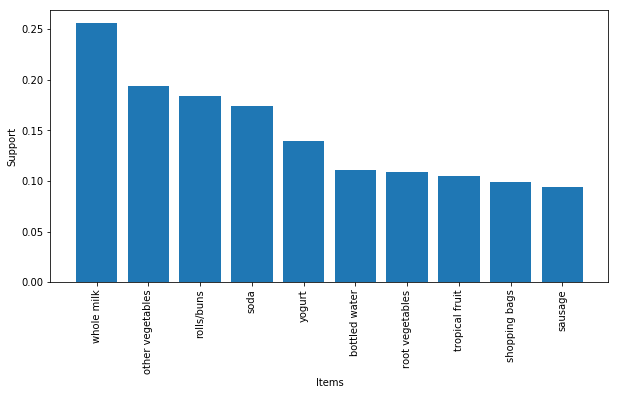

In [24]:
fig = plt.figure(figsize=(10,5))

plt.bar(popular_items['item'], popular_items['support'])
plt.xlabel('Items')
plt.xticks(rotation=90)
plt.ylabel('Support')
plt.show()

**for more information on visualization please see matplotlib official documentation pages**

**https://matplotlib.org/tutorials/index.html**

In [25]:
grocery.shape

(9835, 169)

In [26]:
grocery.head(2)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2. Short-list frequently occuring items/item sets by choosing a support level

**We will leverage the apriori algorithm which we imported to do this**

In [27]:
freq_items = apriori(grocery, min_support=0.01, use_colnames=True, max_len = None)
print (freq_items.shape)

(333, 2)


In [28]:
freq_items.head(4)

,support,itemsets
0,0.058973,(frankfurter)
1,0.093950,(sausage)
2,0.026029,(ham)
3,0.025826,(meat)


**Q. How to sort the data frame with most frequently occuring 20 itemsets??**

In [29]:
freq_items.sort_values('support', ascending=False).head(3)

,support,itemsets
18,0.255516,(whole milk)
16,0.193493,(other vegetables)
40,0.183935,(rolls/buns)


## Step 3: From the frequently occuring item sets, generate association rules by choosing a metric

In [30]:
arules = association_rules(freq_items, metric='confidence', min_threshold=0.3)
arules.shape

(125, 9)

In [31]:
arules.sort_values('confidence', ascending=False).iloc[:,:-2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
73,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608
79,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999
120,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125
99,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885
81,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969
96,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354
105,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336
122,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747
97,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888
90,"(pip fruit, other vegetables)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351
